In [20]:
using PyPlot
using Distributions
using QuantEcon: meshgrid
using DataFrames

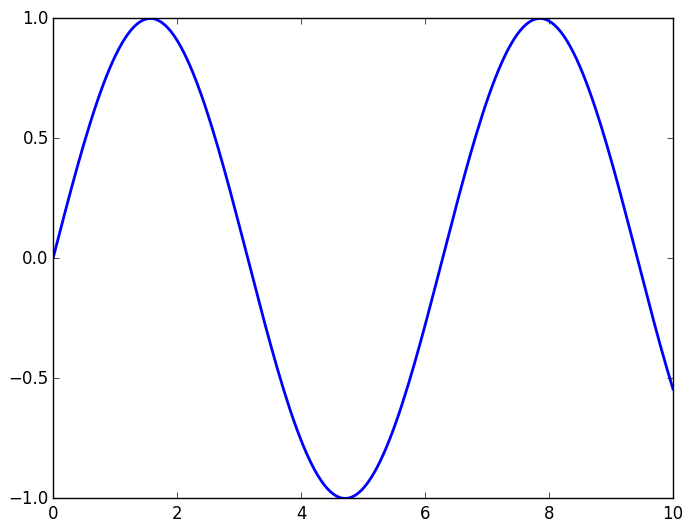

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffa63bd7cd0>

In [3]:
x = linspace(0, 10, 200)
y = sin(x)
plot(x, y, "b-", linewidth=2)

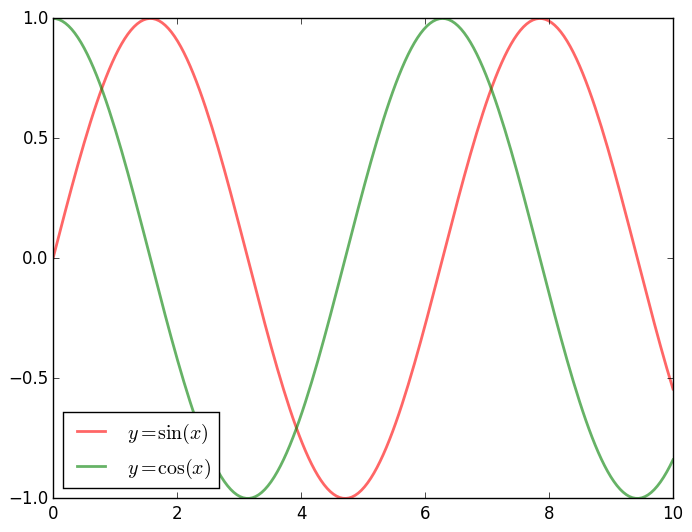

PyObject <matplotlib.legend.Legend object at 0x7f862e4a9a90>

In [11]:
fig, ax = subplots()
ax[:plot](x, sin(x), "r-", linewidth=2, label=L"$y = \sin(x)$", alpha=0.6)
ax[:plot](x, cos(x), "g-", linewidth=2, label=L"$y = \cos(x)$", alpha=0.6)
ax[:legend](loc = "lower left")

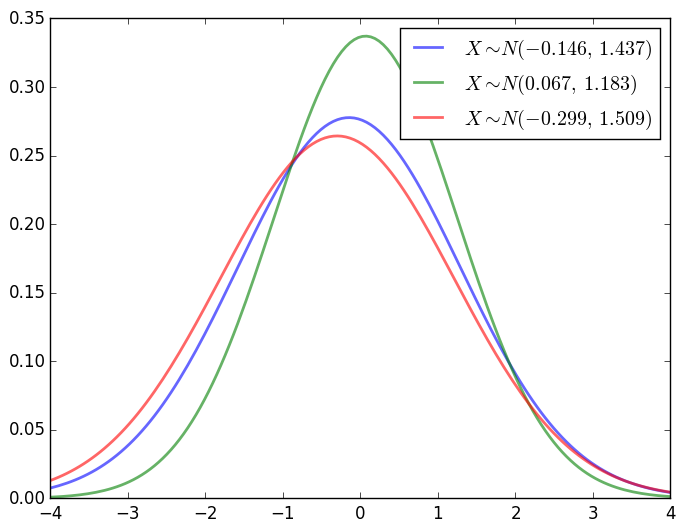

PyObject <matplotlib.legend.Legend object at 0x7ffa42cafdd0>

In [9]:
u = Uniform()

fig, ax = subplots()
x = linspace(-4, 4, 150)
for i in 1:3
    m, s = rand(u) * 2 - 1, rand(u) + 1
    mstr, sstr = @sprintf("%2.3f", m), @sprintf("%2.3f", s)
    d = Normal(m, s)
    y = pdf(d, x)
    ax[:plot](x, y, linewidth=2, alpha=0.6, label=latexstring("\$X \\sim N(", mstr, ",\\, ", sstr, ")\$"))
end
ax[:legend]()

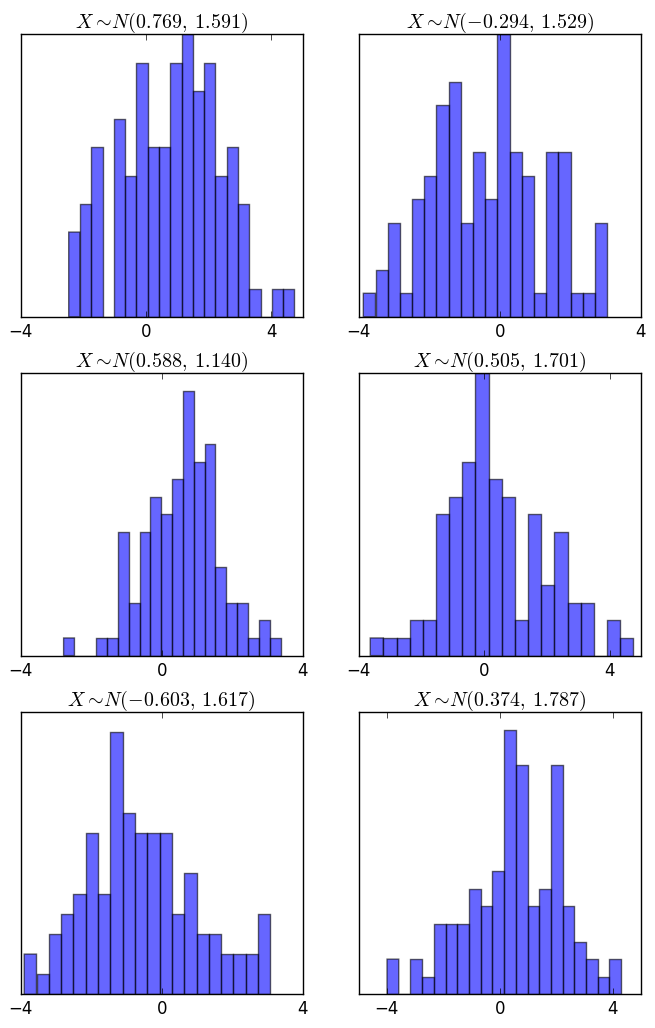

In [15]:
u = Uniform()
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))

for i in 1:num_rows
    for j in 1:num_cols
        ax = axes[i, j]
        m, s = rand(u) * 2 - 1, rand(u) + 1
        mstr, sstr = @sprintf("%2.3f", m), @sprintf("%2.3f", s)
        d = Normal(m, s)
        x = rand(d, 100)
        ax[:hist](x, alpha=0.6, bins=20)
        ax[:set_title](latexstring("\$X \\sim N(", mstr, ",\\, ", sstr, ")\$"))
        ax[:set_xticks]([-4, 0, 4])
        ax[:set_yticks]([])
    end
end

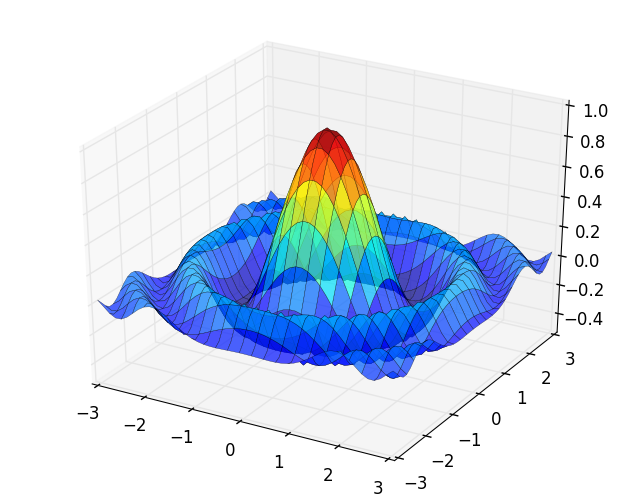

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7ffa427ab350>

In [19]:
n = 50
x = linspace(-3, 3, n)
y = x

z = Array(Float64, n, n)
f(x, y) = cos(x^2 + y^2) / (1 + x^2 + y^2)
for i in 1:n
    for j in 1:n
        z[j, i] = f(x[i], y[j])
    end
end

fig = figure(figsize=(8, 6))
ax = fig[:gca](projection="3d")
ax[:set_zlim](-0.5, 1.0)
xgrid, ygrid = meshgrid(x, y)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("jet"), alpha=0.7, linewidth=0.25)

In [21]:
commodities = ["crude", "gas", "gold", "silver"]
last = @data([4.2, 11.3, 12.1, NA])
df = DataFrame(commod = commodities, price = last)

,commod,price
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,NA


In [22]:
df[:price]

4-element DataArray{Float64,1}:
  4.2
 11.3
 12.1
   NA

In [23]:
df[:commod]

4-element DataArray{ASCIIString,1}:
 "crude" 
 "gas"   
 "gold"  
 "silver"

In [24]:
describe(df)

commod
Length  4
Type    ASCIIString
NAs     0
NA%     0.0%
Unique  4

price
Min      4.2
1st Qu.  7.75
Median   11.3
Mean     9.200000000000001
3rd Qu.  11.7
Max      12.1
NAs      1
NA%      25.0%



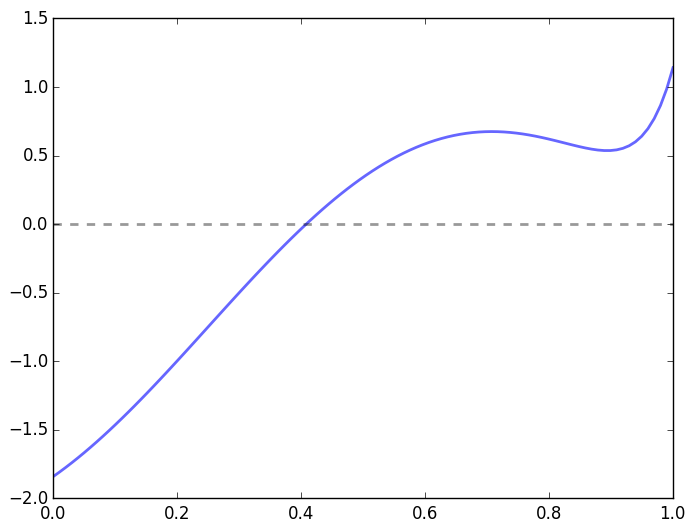

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffa41a88e50>

In [33]:
x = linspace(0, 1, 100)
y = Array(Float64, length(x))
z = zeros(length(x))
for (i, x_val) in enumerate(x)
    y[i] = sin(4(x_val-1/4)) + x_val + x_val^20 - 1
end
plot(x, y, "b-", alpha=0.6, linewidth=2)
plot(x, z, "k--", alpha=0.4, linewidth=2)

In [37]:
using Roots
f(x) = sin(4(x-1/4)) + x + x^20 - 1
newton(f, 0.2)

0.40829350427936706

In [38]:
newton(f, 0.7)

-1.0022469256696989

In [39]:
fzero(f, 0, 1)

0.40829350427936706

In [54]:
using Optim
optimize(x -> x^2, -1.0, 1.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-1.000000, 1.000000]
 * Minimum: -0.000000
 * Value of Function at Minimum: 0.000000
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6


In [55]:
quadgk(x -> cos(x), -2pi, 2pi)

(1.6854805424699549e-15,1.3777876519646252e-20)

In [57]:
using QuantEcon
nodes, weights = qnwlege(65, -2pi, 2pi)
integral = do_quad(x -> cos(x), nodes, weights)

-2.9819896552041314e-15

In [59]:
@time quadgk(x -> cos(x), -2pi, 2pi)

elapsed time: 6.317671105 seconds (984391720 bytes allocated, 49.96% gc time)


(1.6854805424699549e-15,1.3777876519646252e-20)

In [60]:
@time do_quad(x -> cos(x), nodes, weights)

elapsed time: 0.001952015 seconds (1840 bytes allocated)


-2.9819896552041314e-15